# Greenhouse gas emission analysis

Reference:

- Data source:
    <https://data.worldbank.org/topic/climate-change?end=2018&start=1973>
- Custom scatterplot colors with colorbar in Matplotlib:
    <https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html>
- Legend guide
    <https://matplotlib.org/users/legend_guide.html>
- Greenhouse gas
    <https://en.wikipedia.org/wiki/Greenhouse_gas>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
climate_1960_2018 = pd.read_csv('datasets/climate_1960_2018.csv')
climate_1960_2018.drop(columns='Unnamed: 63', inplace=True)

In [3]:
climate_1960_2018.shape

(20064, 63)

In [4]:
indicators = ['Population, total',
              'CO2 emissions (kt)',
              'CO2 emissions (metric tons per capita)',
              'Methane emissions (kt of CO2 equivalent)',
              'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
              'SF6 gas emissions (thousand metric tons of CO2 equivalent)',
              'PFC gas emissions (thousand metric tons of CO2 equivalent)',
              'HFC gas emissions (thousand metric tons of CO2 equivalent)',
              'Total greenhouse gas emissions (kt of CO2 equivalent)']

ghg_1960_2018 = climate_1960_2018[climate_1960_2018['Indicator Name'].isin(indicators)]
ghg_1960_2018.fillna(0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
ghg_1960_2018.drop(columns=['Country Code', 'Indicator Code'], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
def df_4each_indicator(glb_df, indicator):
    df = glb_df[glb_df['Indicator Name'] == indicator]
    df.index = df['Country Name']
    df.drop(columns=['Country Name', 'Indicator Name'], inplace=True)
    df = df.T
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    return df

In [7]:
pop_tot_1960_2018 = df_4each_indicator(ghg_1960_2018, 'Population, total')
co2_kt_1960_2018 = df_4each_indicator(ghg_1960_2018, 'CO2 emissions (kt)')
co2_tons_1960_2018 = df_4each_indicator(ghg_1960_2018, 'CO2 emissions (metric tons per capita)')
methane_1960_2018 = df_4each_indicator(ghg_1960_2018, 'Methane emissions (kt of CO2 equivalent)')
n2o_1960_2018 = df_4each_indicator(ghg_1960_2018,
                                   'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')
greenhouse_gas_1960_2018 = df_4each_indicator(ghg_1960_2018,
                                              'Total greenhouse gas emissions (kt of CO2 equivalent)')

In [8]:
def billions_1dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.1f' % (x * 1e-9)


def millions_0dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-6)


def milles_dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-3)

FORMATTER_BILLIONS_1DEC = FuncFormatter(billions_1dec)
FORMATTER_MILLIONS_0DEC = FuncFormatter(millions_0dec)
FORMATTER_MILLES = FuncFormatter(milles_dec)


## Greenhouse gas emission

1 metric ton = 0.98421 ton

In [9]:
co2_kt_pos = co2_kt_1960_2018[co2_kt_1960_2018['World'] > 0]
co2_tons_pos = co2_tons_1960_2018[co2_tons_1960_2018['World'] > 0]

greenhouse_gas_pos = greenhouse_gas_1960_2018[greenhouse_gas_1960_2018['World'] > 0] # kt of CO2 equivalent
methane_pos = methane_1960_2018[methane_1960_2018['World'] > 0] # kt of CO2 equivalent
n2o_pos = n2o_1960_2018[n2o_1960_2018['World'] > 0] # thousand metric tons of CO2 equivalent
n2o_pos['World_kt'] = n2o_pos['World'] * 0.98421 # kt of CO2 equivalent

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
ghg_world_hist_df = pd.merge(greenhouse_gas_pos[['World']],
                             co2_kt_pos[['World']],
                             left_index=True,
                             right_index=True,
                             how='left',
                             suffixes=('_ghg', '_co2'))
ghg_world_hist_df = pd.merge(ghg_world_hist_df,
                             methane_pos[['World']],
                             left_index=True,
                             right_index=True,
                             how='outer').rename(columns={'World':'World_methane'})
ghg_world_hist_df = pd.merge(ghg_world_hist_df,
                             n2o_pos[['World_kt']],
                             left_index=True,
                             right_index=True,
                             how='outer').rename(columns={'World_kt':'World_n2o'})

ghg_world_hist_df['Others'] = ghg_world_hist_df['World_ghg'] - ghg_world_hist_df['World_co2'] - ghg_world_hist_df['World_methane'] - ghg_world_hist_df['World_n2o']


In [11]:
ghg_world_hist_df.head()

Country Name,World_ghg,World_co2,World_methane,World_n2o,Others
1970-01-01,27660218.5,14788798.3,5305820.0,2190782.8,5374817.4
1971-01-01,26263241.3,15323175.6,5145430.0,2056249.7,3738386.0
1972-01-01,28148780.8,15957192.5,5360610.0,2209955.6,4621022.8
1973-01-01,29107899.1,16822109.5,5421500.0,2254845.7,4609443.9
1974-01-01,28434027.1,16850822.1,5379140.0,2204970.1,3999094.9


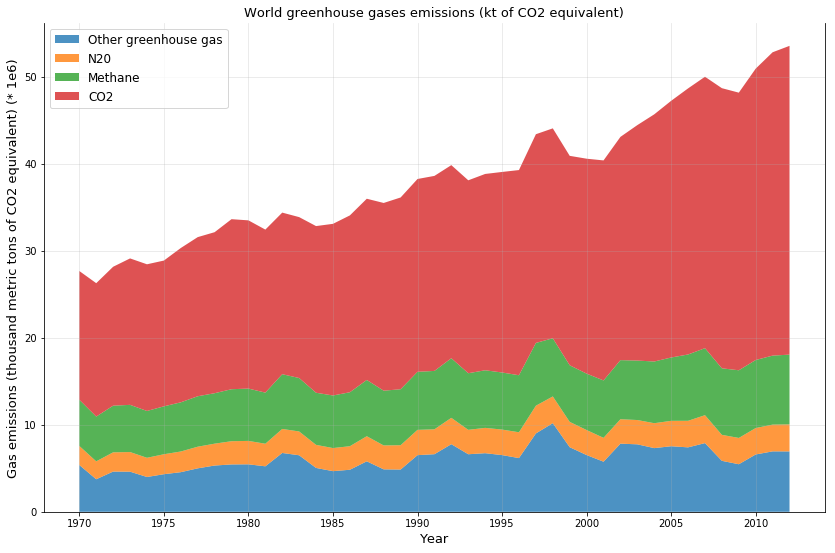

In [12]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))

axarr.set_title('World greenhouse gases emissions (kt of CO2 equivalent)', fontdict={'fontsize': 13})

axarr.stackplot(ghg_world_hist_df.index,
                [ghg_world_hist_df['Others'], ghg_world_hist_df['World_n2o'],
                 ghg_world_hist_df['World_methane'], ghg_world_hist_df['World_co2']],
                labels=['Other greenhouse gas', 'N20', 'Methane', 'CO2'],
                alpha=0.8)

axarr.set_xlabel('Year', size=13)
axarr.set_ylabel('Gas emissions (thousand metric tons of CO2 equivalent) (* 1e6)', size=13)
axarr.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
axarr.legend(loc=2, fontsize='large')
axarr.spines['top'].set_visible(False)
axarr.grid(alpha=0.3)

plt.show()
# plt.savefig('ghg-emission.png', bbox_inches='tight')

<https://en.wikipedia.org/wiki/Greenhouse_gas><br>
Greenhouse gases are those that absorb and emit infrared radiation in the wavelength range emitted by Earth. In order, the most abundant greenhouse gases in Earth's atmosphere are: Water vapor (H2O), Carbon dioxide (CO2), Methane (CH4), Nitrous oxide (N2O), Ozone (O3), Chlorofluorocarbons (CFCs) and Hydrofluorocarbons (includes HCFCs and HFCs). Here, I have only emission data of greenhouse gas, CO2, Methane and Nitrous oxide.

The contribution of each gas to the greenhouse effect is determined by the characteristics of that gas, its abundance, and any indirect effects it may cause. For example, the direct radiative effect of a mass of methane is about 84 times stronger than the same mass of carbon dioxide over a 20-year time frame but it is present in much smaller concentrations so that its total direct radiative effect is smaller, in part due to its shorter atmospheric lifetime. On the other hand, in addition to its direct radiative impact, methane has a large, indirect radiative effect because it contributes to ozone formation. Shindell et al. (2005) argue that the contribution to climate change from methane is at least double previous estimates as a result of this effect.

It is not possible to state that a certain gas causes an exact percentage of the greenhouse effect. This is because some of the gases absorb and emit radiation at the same frequencies as others, so that the total greenhouse effect is not simply the sum of the influence of each gas. The higher ends of the ranges quoted are for each gas alone; the lower ends account for overlaps with the other gases. In addition, some gases, such as methane, are known to have large indirect effects that are still being quantified.

Now let's look at the greenhouse gas emission. Greenhouse gas's emission increased nearly 94% between 1970 and 2012, especially after 2001, it increased 33%. Among all greenhouse gas, CO2-emission quote-part is more than half of greenhouse gas emission, we'll go deeper in the following part. However, the emission of Methane and Nitrous oxide didn't increase that much. Since CO2's emission is usually generated by burning fossil fuels, deforestation or biological respiration, and the emission of Methane and Nitrous oxide is caused by intestinal fermentation, combustion of organisms or fertilizer production, which are less frequency.

## CO2 emissions (kt) & CO2 emissions (metric tons per capita)

<https://en.wikipedia.org/wiki/Carbon_dioxide><br>
Carbon dioxide in Earth's atmosphere is a trace gas, at the mid 2018 having a global average concentration of 409 parts per million by volume (or 622 parts per million by mass). Atmospheric concentrations of carbon dioxide fluctuate slightly with the seasons, falling during the Northern Hemisphere spring and summer as plants consume the gas and rising during northern autumn and winter as plants go dormant or die and decay. Concentrations also vary on a regional basis, most strongly near the ground with much smaller variations aloft. In urban areas concentrations are generally higher and indoors they can reach 10 times background levels.

In [13]:
# colormap
cmap_co2kt = matplotlib.cm.get_cmap('winter_r')
cmap_co2tons = matplotlib.cm.get_cmap('autumn_r') # magma_r

normalize_co2kt = matplotlib.colors.Normalize(vmin=min(co2_kt_pos['World']),
                                              vmax=max(co2_kt_pos['World']))
colors_co2kt = [cmap_co2kt(normalize_co2kt(value)) for value in list(co2_kt_pos['World'].values)]

normalize_co2tons = matplotlib.colors.Normalize(vmin=min(co2_kt_pos['World']),
                                                vmax=max(co2_kt_pos['World']))
colors_co2tons = [cmap_co2tons(normalize_co2tons(value)) for value in list(co2_kt_pos['World'].values)]

In [14]:
not_ctry_list = ['World', 'Post-demographic dividend', 'OECD members', 'High income', 'North America',
                 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified',
                 'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend',
                 'Arab World', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend',
                 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia',
                 'Euro area', 'European Union', 'Middle East & North Africa', 'Middle income',
                 'Middle East & North Africa (excluding high income)', 'Pre-demographic dividend',
                 'South Asia', 'Sub-Saharan Africa (excluding high income)',
                 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
                 'Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
                 'Central Europe and the Baltics', 'Latin America & Caribbean (excluding high income)']
co2_emission_kt_top3 = ['China', 'United States', 'India']
co2_emission_tons_top3 = ['Qatar', 'Curacao', 'Trinidad and Tobago']

co2_emission_kt_exclu = not_ctry_list + co2_emission_kt_top3
co2_emission_tons_exclu = not_ctry_list + co2_emission_tons_top3
pop_exclu = not_ctry_list + co2_emission_kt_top3 + co2_emission_tons_top3

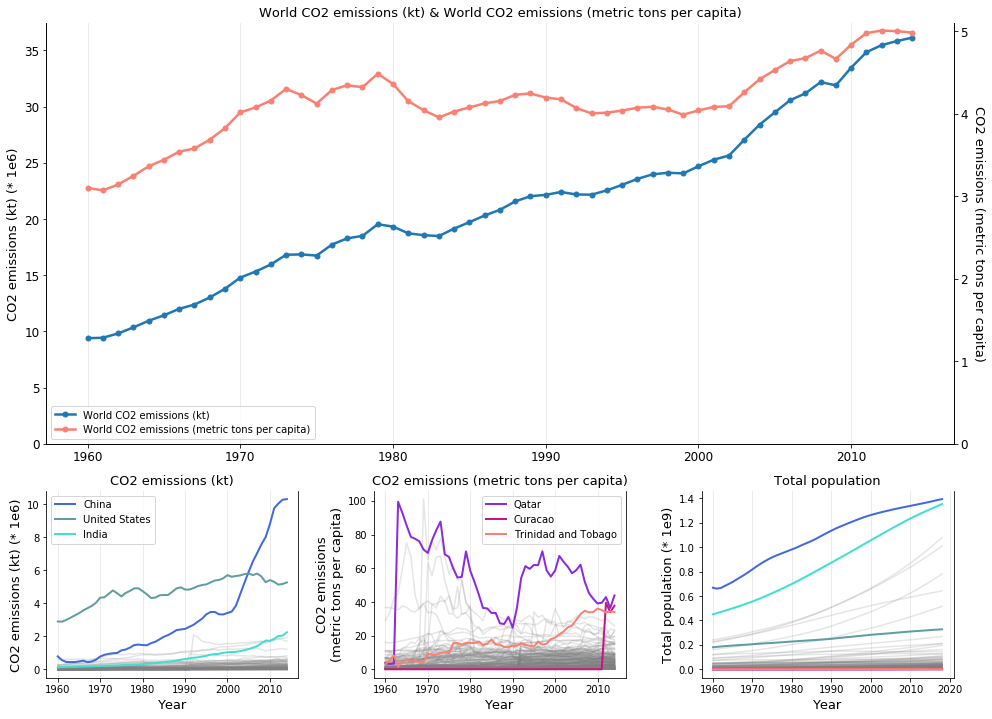

In [15]:
fig, axarr = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))

ax00 = plt.subplot2grid((3, 3), (0, 0), rowspan=2, colspan=3)
ax00.set_title('World CO2 emissions (kt) & World CO2 emissions (metric tons per capita)', fontdict={'fontsize': 13})

line_co2kt, = ax00.plot(co2_kt_pos.index,
                        co2_kt_pos['World'],
                        label='World CO2 emissions (kt)',
                        linewidth=2.5,
                        marker='.',
                        markersize=10)

ax00_02 = ax00.twinx()
line_co2tons, = ax00_02.plot(co2_tons_pos.index,
                             co2_tons_pos['World'],
                             color='salmon',
                             label='World CO2 emissions (metric tons per capita)',
                             linewidth=2.5,
                             marker='.',
                             markersize=10)

ax00.tick_params(axis='both', labelsize=12)
ax00.set_ylabel('CO2 emissions (kt) (* 1e6)', size=13)
ax00.set_ylim(bottom=0)
ax00.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
ax00.spines['top'].set_visible(False)
ax00.grid(alpha=0.3, axis='x')
ax00.legend(loc=3)
ax00.legend(handles=[line_co2kt, line_co2tons], loc=3)


ax00_02.tick_params(axis='both', labelsize=12)
ax00_02.set_ylabel('CO2 emissions (metric tons per capita)', rotation=270, labelpad=17, size=13)
ax00_02.set_ylim(bottom=0)
ax00_02.spines['top'].set_visible(False)


ax20 = axarr[2, 0]
ax20.set_title('CO2 emissions (kt)', fontdict={'fontsize': 13})

for col in co2_kt_pos.drop(columns=co2_emission_kt_exclu).columns:
    ax20.plot(co2_kt_pos.index,
              co2_kt_pos[col],
              label=col,
              color='gray',
              alpha=0.2)

line_cn, = ax20.plot(co2_kt_pos.index,
                     co2_kt_pos['China'],
                     color='royalblue',
                     linewidth=2)
line_us, = ax20.plot(co2_kt_pos.index,
                     co2_kt_pos['United States'],
                     color='cadetblue',
                     linewidth=2)
line_in, = ax20.plot(co2_kt_pos.index,
                     co2_kt_pos['India'],
                     color='turquoise',
                     linewidth=2)

ax20.set_xlabel('Year', size=13)
ax20.set_ylabel('CO2 emissions (kt) (* 1e6)', size=13)
ax20.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
ax20.legend(handles=[line_cn, line_us, line_in], loc=2)
ax20.spines['top'].set_visible(False)
ax20.grid(alpha=0.3, axis='x')


ax21 = axarr[2, 1]
ax21.set_title('CO2 emissions (metric tons per capita)', fontdict={'fontsize': 13})

for col in co2_tons_pos.drop(columns=co2_emission_tons_exclu).columns:
    ax21.plot(co2_tons_pos.index,
              co2_tons_pos[col],
              label=col,
              color='gray',
              alpha=0.2)

line_qa, = ax21.plot(co2_tons_pos.index,
                     co2_tons_pos['Qatar'],
                     color='blueviolet', # purple
                     linewidth=2)
line_cw, = ax21.plot(co2_tons_pos.index,
                     co2_tons_pos['Curacao'],
                     color='mediumvioletred',
                     linewidth=2)
line_tt, = ax21.plot(co2_tons_pos.index,
                     co2_tons_pos['Trinidad and Tobago'],
                     color='salmon',
                     linewidth=2)

ax21.set_xlabel('Year', size=13)
ax21.set_ylabel('CO2 emissions\n(metric tons per capita)', size=13)
ax21.legend(handles=[line_qa, line_cw, line_tt], loc=1)
ax21.spines['top'].set_visible(False)
ax21.grid(alpha=0.3, axis='x')


ax22 = axarr[2, 2]
ax22.set_title('Total population', fontdict={'fontsize': 13})

for col in pop_tot_1960_2018.drop(columns=pop_exclu).columns:
    ax22.plot(pop_tot_1960_2018.index,
              pop_tot_1960_2018[col],
              label=col,
              color='gray',
              alpha=0.2)

pop_cn, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['China'],
                     color='royalblue',
                     linewidth=2)
pop_us, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['United States'],
                     color='cadetblue',
                     linewidth=2)
pop_in, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['India'],
                     color='turquoise',
                     linewidth=2)
    
pop_qa, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Qatar'],
                     color='blueviolet', # purple
                     linewidth=2)
pop_cw, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Curacao'],
                     color='mediumvioletred',
                     linewidth=2)
pop_tt, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Trinidad and Tobago'],
                     color='salmon',
                     linewidth=2)

ax22.set_xlabel('Year', size=13)
ax22.set_ylabel('Total population (* 1e9)', size=13)
ax22.yaxis.set_major_formatter(FORMATTER_BILLIONS_1DEC)
ax22.spines['top'].set_visible(False)
ax22.grid(alpha=0.3, axis='x')


plt.subplots_adjust(hspace=0.25, wspace=0.3, top=0.95,
                    bottom=0.04, left=0.05, right=0.95)
plt.show()
# plt.savefig('co2-emission.png', bbox_inches='tight')

The concentration of carbon dioxide has risen due to human activities. Combustion of fossil fuels and deforestation have caused the atmospheric concentration of carbon dioxide to increase by about 43% since the beginning of the age of industrialization. Most carbon dioxide from human activities is released from burning coal and other fossil fuels. Other human activities, including deforestation, biomass burning, and cement production also produce carbon dioxide. Human activities emit about 29 billion tons of carbon dioxide per year, while volcanoes emit between 0.2 and 0.3 billion tons. Human activities have caused CO2 to increase above levels not seen in hundreds of thousands of years. Currently, about half of the carbon dioxide released from the burning of fossil fuels remains in the atmosphere and is not absorbed by vegetation and the oceans.

According to the graphs above, the world's CO2 emission increases 285% from 1960 to 2014, especially after 2000, it increases 46%. The top 3 countries in 2014 are China, United States and India. For United States and India, their emissions increased gently; on the contrary, China's CO2 emission exceeded United States and became the country whose CO2 emission is more than others. Between 2000 and 2014, China's CO2 emission increases 200%, which corresponds the world's emission curve.

Moreover, the world's CO2 emission per capita increases 61% from 1960 to 2014, especially after 2000, it increases 22%. Similarly, I find out the top 3 countries are Qatar, Curacao and Trinidad and Tobago. Considering the population per country, we observe that these 3 countries have pretty small population, so it's not difficult to understand why their CO2 emission per capita are more than other countries'.

(Yes, I only find data until 2014, it's really a pity, if you have found open source data for recent years, it's welcome!!)

### Map

In [16]:
import geopandas as gpd

assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)
gdf.rename(columns={'name':'Country'}, inplace=True)

In [17]:
gdf['Country'] = gdf['Country'].replace({'United States of America':'United States',
                                         'Bosnia and Herz.':'Bosnia and Herzegovina',
                                         'Central African Rep.':'Central African Republic',
                                         'Congo':'Congo, Rep.',
                                         'Dem. Rep. Congo':'Congo, Dem. Rep.',
                                         'Dominican Rep.':'Dominican Republic',
                                         'Egypt':'Egypt, Arab Rep.',
                                         'Iran':'Iran, Islamic Rep.',
                                         'Kyrgyzstan':'Kyrgyz Republic',
                                         'Russia':'Russian Federation',
                                         'Solomon Is.':'Solomon Islands',
                                         'Brunei':'Brunei Darussalam',
                                         'Czechia':'Czech Republic',
                                         'Eq. Guinea':'Equatorial Guinea',
                                         'S. Sudan':'South Sudan',
                                         'Slovakia':'Slovak Republic',
                                         'Syrian Arab Republic':'Syria',
                                         'Venezuela':'Venezuela, RB',
                                         'Yemen':'Yemen, Rep.',
                                         'eSwatini':'Eswatini'})

In [18]:
co2_kt_pos.rename(columns={'Bahamas, The':'Bahamas',
                           'Cote d\'Ivoire':'Côte d\'Ivoire',
                           'Gambia, The':'Gambia',
                           'Korea, Dem. People’s Rep.':'North Korea',
                           'Korea, Rep.':'South Korea',
                           'Lao PDR':'Laos',
                           'North Macedonia':'Macedonia'}, inplace=True)
co2_kt_hist = co2_kt_pos.drop(columns=not_ctry_list).stack().reset_index().rename(columns={'level_0':'Date',
                                                                                           'Country Name':'Country',
                                                                                           0:'CO2_kt'})

co2_kt_hist = pd.merge(co2_kt_hist, gdf[['Country']], on='Country')
co2_kt_hist.sort_values(['Country', 'Date'], inplace=True)
co2_kt_hist.reset_index(drop=True, inplace=True)
# take only history after 2001
co2_kt_hist = co2_kt_hist[co2_kt_hist.Date > '2001-01-01'].reset_index(drop=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [19]:
gdf_co2_hist = pd.merge(gdf, co2_kt_hist[['Country']], on='Country')
gdf_co2_hist.drop_duplicates(subset=['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est'], inplace=True)
gdf_co2_hist = gdf_co2_hist.sort_values('Country').reset_index(drop=True)
gdf_co2_hist = gdf_co2_hist[['Country', 'gdp_md_est', 'geometry']]

In [20]:
# co2_kt_hist.Country[co2_kt_hist.Country.isin(gdf.Country)==False].sort_values()

In [21]:
# gdf.Country[gdf.Country.isin(co2_kt_hist.Country)==False].sort_values()

In [22]:
datetime_index = pd.DatetimeIndex(co2_kt_hist['Date'].unique())

dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [23]:
styledata = {}

s = 0
e = 13 # 55
for i in gdf_co2_hist.index:
    df = pd.DataFrame(
        {'color': np.array(co2_kt_hist.CO2_kt[s:e]),
         'opacity': np.array([1] * 13)}, #55
        index=dt_index
    )
    styledata[i] = df
    s += 13 # 55
    e += 13 # 55


In [24]:
max_color = max(co2_kt_hist['CO2_kt'])
min_color = min(co2_kt_hist['CO2_kt'])
max_opacity, min_opacity = 1, 1

In [25]:
import branca.colormap as cm
cmap = cm.LinearColormap(
    ['green', 'yellow', 'red'],
    vmin=min_color, vmax=max_color
)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1


In [26]:
cmap

In [27]:
styledict = {
    str(ctry): data.to_dict(orient='index') for ctry, data in styledata.items()
}

In [28]:
import folium
from folium.plugins import TimeSliderChoropleth

co2_kt_hist_map = folium.Map(location=[0, 0], zoom_start = 1.5, tiles='cartodbpositron')# cartodbpositron, Stamen Toner

TimeSliderChoropleth(
    gdf_co2_hist.to_json(),
    styledict=styledict
).add_to(co2_kt_hist_map)

co2_kt_hist_map
# co2_kt_hist_map.save('co2_kt_hist_map.html')

Although we lack data of some countries or regions, we can still find that the CO2 emission doesn't change a lot for almost countries or regions and their CO2 emission is not that much in general; except for China, United States and India, which correspond to the line charts above.